In [ ]:
insert_animal = 'F'
inputEventTrace = '/Users/rufusmitchell-heggs/Desktop/data/preprocessing/AN'+insert_animal+'/preprocessed_files/AN'+insert_animal+'mega_events.csv'
inputTrace = '/Users/rufusmitchell-heggs/Desktop/data/preprocessing/AN'+insert_animal+'/preprocessed_files/AN'+insert_animal+'mega_trace.csv'

import random
import numpy as np
import statistics 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from scipy import ndimage
from scipy import stats
from scipy.spatial import distance
from scipy.stats.stats import pearsonr 
import scipy.signal 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

from sklearn import preprocessing
from itertools import cycle
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

import matlab
import matlab.engine

#plotting params
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = '0.5'
mpl.rcParams['axes.labelsize'] = '8'
mpl.rcParams['axes.labelcolor'] = 'black'

mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['xtick.labelsize'] = '8'
mpl.rcParams['ytick.labelsize'] = '8'
mpl.rcParams['ytick.color'] = 'black'

data_event = pd.read_csv(inputEventTrace, sep=',', dtype=str, error_bad_lines=False, encoding="utf-8-sig")
data_trace = pd.read_csv(inputTrace, sep=',', dtype=str, error_bad_lines=False, encoding="utf-8-sig")
data_trace['unique_stage']=data_trace['stage']+data_trace['session'].astype(str)

def get_session(data_event_or_data_trace):
    """"get session takes the mega_event or trace file in and returns a list of all the session blocks
    INPUT:
    -------
    >> data_event_or_data_trace - mega_events OR mega_trace file
    
    OUTPUT:
    -------
    >> blocks - a list of all events or traces as in dataframe format """

    batches_dic = {'Exp1':1, 'Pre1':2, 'Nov1':3, 'Exp2':4, 'Pre2':5, 'Nov2':6, 'Exp3':7, 'Nov3':8}
    batches = list(set(data_event_or_data_trace.unique_stage))
    sorted_batches = []
    for i in batches:
        sorted_batches.append(batches_dic[i])
    sorted_batches.sort()

    batches = []
    for i in sorted_batches:
        batches.append(list(batches_dic.keys())[list(batches_dic.values()).index(i)])
    
    blocks = []
    for batch in batches:
        blocks.append(data_event_or_data_trace[data_event_or_data_trace['unique_stage']==batch])

    return blocks

traces = get_session(data_trace)
events = get_session(data_event)

In [65]:
inputcelllocation = '/Users/rufusmitchell-heggs/Desktop/data/preprocessing/AN'+insert_animal+'/AN'+insert_animal+'Traces-props.csv'
cells = pd.read_csv(inputcelllocation, sep=',', dtype=str, error_bad_lines=False, encoding="utf-8-sig")
cells_session_1 = np.array(cells.loc[cells['ActiveSegment0'] == '1']['Name'])
cells_session_2 = np.array(cells.loc[cells['ActiveSegment3'] == '1']['Name'])
cells_session_3 = np.array(cells.loc[cells['ActiveSegment6'] == '1']['Name'])

animal_cell_count = {'F':238, 'I':126, 'L':74}
common_cells_session_123= 100*len(list(set(list(set(cells_session_1).intersection(cells_session_2))).intersection(cells_session_3)) )/animal_cell_count[insert_animal]
common_cells_session_12= 100*len(list(set(cells_session_1).intersection(cells_session_2)))/animal_cell_count[insert_animal]
common_cells_session_13= 100*len(list(set(cells_session_1).intersection(cells_session_3)))/animal_cell_count[insert_animal]
common_cells_session_23= 100*len(list(set(cells_session_2).intersection(cells_session_3)))/animal_cell_count[insert_animal]

if insert_animal == 'F':
    Fcommon_cells_session_123= 100*len(list(set(list(set(cells_session_1).intersection(cells_session_2))).intersection(cells_session_3)) )/animal_cell_count[insert_animal]
    Fcommon_cells_session_12= 100*len(list(set(cells_session_1).intersection(cells_session_2)))/animal_cell_count[insert_animal]
    Fcommon_cells_session_13= 100*len(list(set(cells_session_1).intersection(cells_session_3)))/animal_cell_count[insert_animal]
    Fcommon_cells_session_23= 100*len(list(set(cells_session_2).intersection(cells_session_3)))/animal_cell_count[insert_animal]
if insert_animal == 'L':
    Lcommon_cells_session_123= 100*len(list(set(list(set(cells_session_1).intersection(cells_session_2))).intersection(cells_session_3)) )/animal_cell_count[insert_animal]
    Lcommon_cells_session_12= 100*len(list(set(cells_session_1).intersection(cells_session_2)))/animal_cell_count[insert_animal]
    Lcommon_cells_session_13= 100*len(list(set(cells_session_1).intersection(cells_session_3)))/animal_cell_count[insert_animal]
    Lcommon_cells_session_23= 100*len(list(set(cells_session_2).intersection(cells_session_3)))/animal_cell_count[insert_animal]
if insert_animal == 'I':
    Icommon_cells_session_123= 100*len(list(set(list(set(cells_session_1).intersection(cells_session_2))).intersection(cells_session_3)) )/animal_cell_count[insert_animal]
    Icommon_cells_session_12= 100*len(list(set(cells_session_1).intersection(cells_session_2)))/animal_cell_count[insert_animal]
    Icommon_cells_session_13= 100*len(list(set(cells_session_1).intersection(cells_session_3)))/animal_cell_count[insert_animal]
    Icommon_cells_session_23= 100*len(list(set(cells_session_2).intersection(cells_session_3)))/animal_cell_count[insert_animal]
    
print(Icommon_cells_session_12,
Icommon_cells_session_13,
Icommon_cells_session_23)

52.38095238095238 46.82539682539682 51.58730158730159


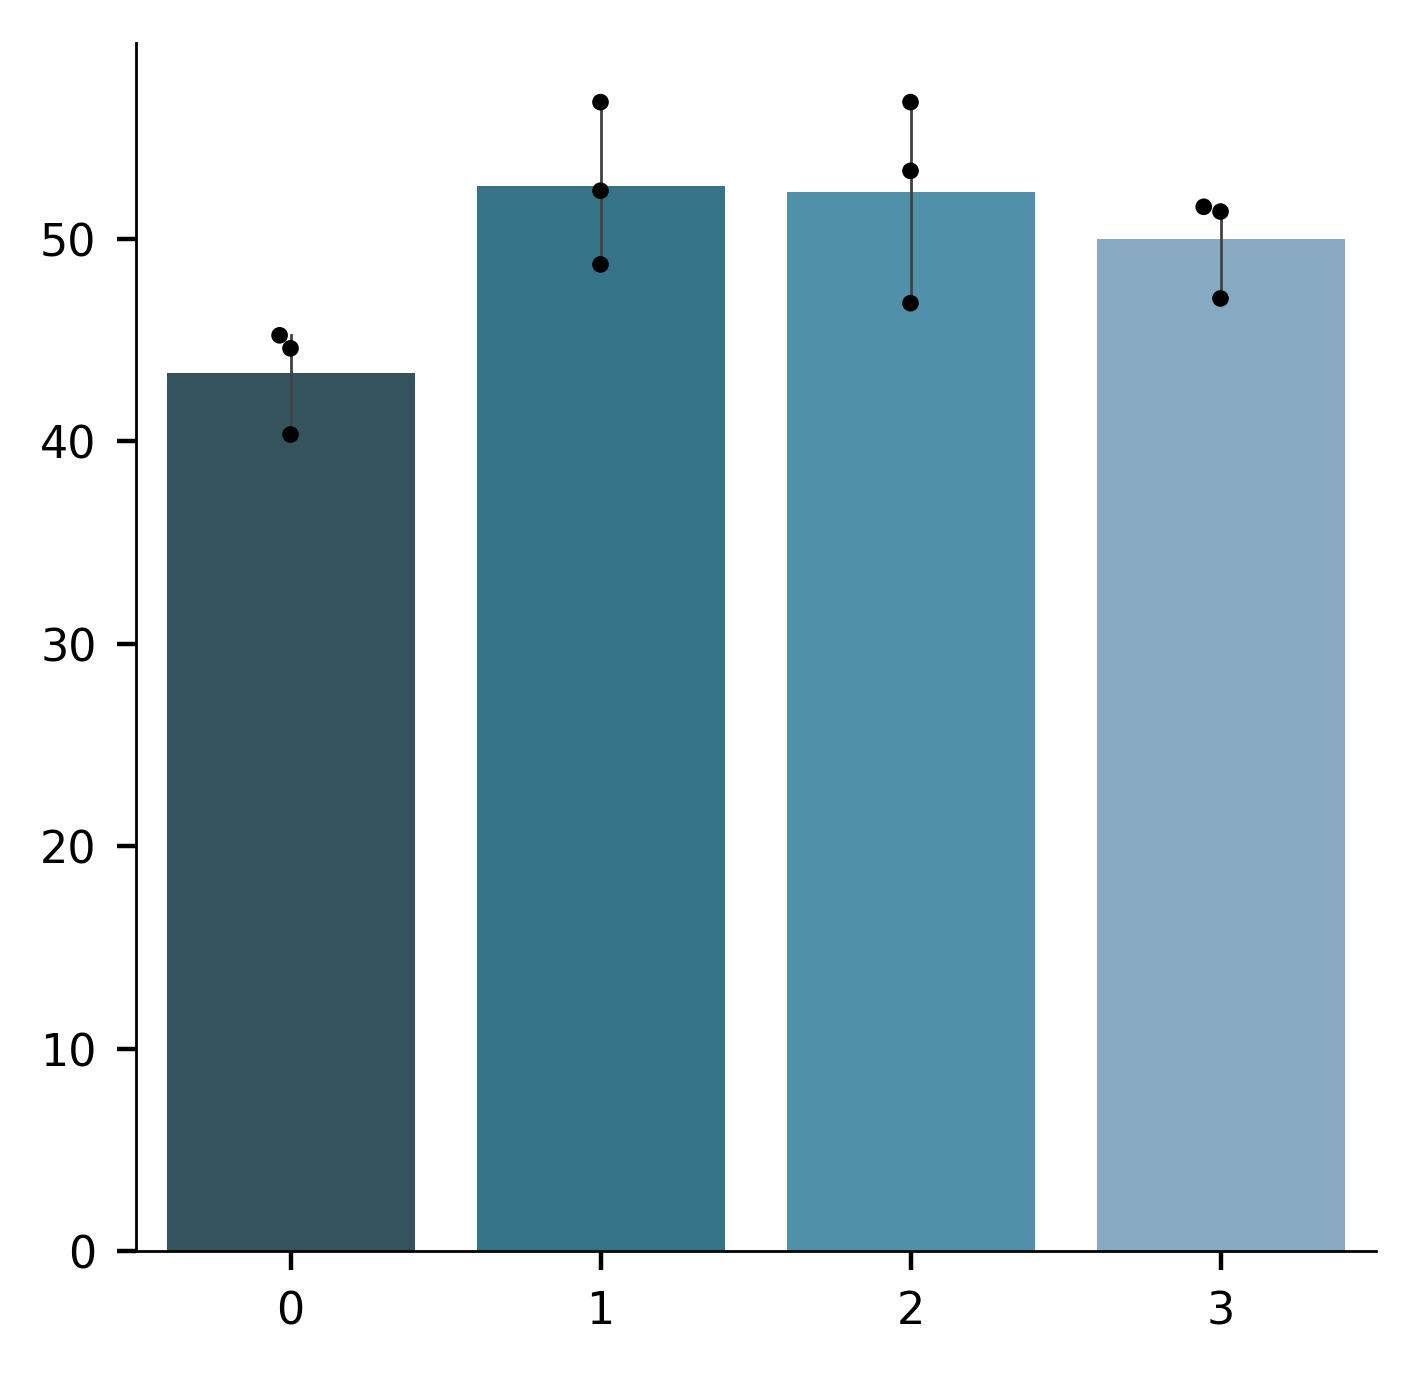

In [55]:
all_common_cells_session_123 = [Fcommon_cells_session_123, Lcommon_cells_session_123, Icommon_cells_session_123]
all_common_cells_session_12 = [Fcommon_cells_session_12, Lcommon_cells_session_12, Icommon_cells_session_12]
all_common_cells_session_13 = [Fcommon_cells_session_13, Lcommon_cells_session_13, Icommon_cells_session_13] 
all_common_cells_session_23 = [Fcommon_cells_session_23, Lcommon_cells_session_23, Icommon_cells_session_23]

fig = plt.figure(num=None, figsize=(4, 4), dpi=400, facecolor='w', edgecolor='k')

sns.barplot(data=[all_common_cells_session_123, all_common_cells_session_12, all_common_cells_session_13, all_common_cells_session_23], errwidth=.5, palette="PuBuGn_d")
sns.swarmplot(data=[all_common_cells_session_123, all_common_cells_session_12, all_common_cells_session_13, all_common_cells_session_23], color="k", s=3)
sns.despine()

# plt.bar(['All Sessions'],wt_avg_onon, yerr=wt_sem_onon,error_kw=dict(lw=0.5, capsize=1, capthick=0.5), color='green')
# plt.bar(['Sessions \n 1 & 2'],all_common_cells_session_123, yerr=wt_sem_offoff,error_kw=dict(lw=0.5, capsize=1, capthick=0.5),  color='purple')                                                                                    
# plt.bar(['Sessions \n 1 & 3'],all_common_cells_session_12, yerr=wt_sem_onoff,error_kw=dict(lw=0.5, capsize=1, capthick=0.5), color='lightgray')                                                                                    
# plt.bar(['Sessions \n 2 & 3'],all_common_cells_session_13, yerr=wt_sem_onoffother,error_kw=dict(lw=0.5, capsize=1, capthick=0.5), color='gray')                                                                                    

# # plt.title('WT')
# # plt.ylabel("Avg pairwise mutual information (bits)")
# # plt.ylim(0, 0.1)
# sns.despine()


# plt.show()

In [ ]:
sesh = 1
stranger = 2
## --------------------------------------------------------------------------------------------------
traces_session = traces[sesh]
events_session = events[sesh]

animal_cell_count = {'F':238, 'I':126, 'L':74}
all_cells = traces_session.iloc[: , 2:animal_cell_count[insert_animal]] #<---- (ANF - 238 cells, ANI - 126 cells, ANL - 74 cells)
cells_dictionary = traces_session.iloc[: , 2:animal_cell_count[insert_animal]].loc[:,~(traces_session==" nan").any()].columns.values
nan_cells = (set(all_cells.columns.values).difference(cells_dictionary))

data_trace = np.array(traces_session[cells_dictionary].astype(float)).transpose()
data_events=np.array(events_session[cells_dictionary].astype(float)).transpose()
data_events_normalized = normalize(data_events, axis=1)

behav_vector = np.array(traces_session['raw_behaviour'].astype(float))

cage = stranger
behav_vec_cropped = []
for i in behav_vector:
    if cage == 2:
        if i == 2:
            behav_vec_cropped.append(1)
        elif i == 1:
            behav_vec_cropped.append(0)
        else:
            behav_vec_cropped.append(0) 
    elif cage == 1:
        if i == 2:
            behav_vec_cropped.append(0)
        elif i == 1:
            behav_vec_cropped.append(1)
        else:
            behav_vec_cropped.append(0) 
    elif cage == 'both':
        if i > 0:
            behav_vec_cropped.append(1)
        else:
            behav_vec_cropped.append(0) 
    
behav_vector = np.array(behav_vec_cropped)

In [ ]:
def event_categorization(event_trace, bin_size = 0.25):
    """"Categorize all event traces into different bins of spike amplitudes.
    Due to low resolution, we can account for any lost spikes and weight events accordingly"""
    bin_size = bin_size #<---- must be greater than 0.25
    all_events = []
    data_events_categorised = []
    for neuron in range(len(event_trace)):
        neuron_events_categorised = []
        for event in event_trace[neuron]:
            if event > 0:
                if event < bin_size:
                    neuron_events_categorised.append(1)
                elif bin_size < event < (bin_size*2):
                    neuron_events_categorised.append(2)
                elif (bin_size*2) < event < (bin_size*3):
                    neuron_events_categorised.append(3)
                elif (bin_size*3) < event :
                    neuron_events_categorised.append(4)
            else:
                neuron_events_categorised.append(0)         
        data_events_categorised.append(neuron_events_categorised)
    return data_events_categorised

def spike_binning(spike_array, bin_size=4):
    bin_size = bin_size
    binned_spikes = []
    for neuron in spike_array:
        per_neuron=[]
        i=0
        while i <= len(neuron):
            per_neuron.append(sum(neuron[i:i+bin_size]))
            i+=bin_size
        binned_spikes.append(per_neuron)
    return binned_spikes

def behav_vector_binning(behav_vector, bin_size=4):
    bin_size = bin_size
    binned_behav_vector = []
    i=0
    while i <= len(behav_vector):
        binned_behav_vector.append(stats.mode(behav_vector[i:i+bin_size])[0])
        i+=bin_size
    return binned_behav_vector

data_events_categorised = event_categorization(data_events_normalized, bin_size = 0.25)
binned_data_events_categorised = np.array(spike_binning(data_events_categorised))
binned_behav_vector = np.array(np.array(behav_vector_binning(behav_vector)).transpose().tolist()[0])

empty = []
empty_binary = []
for i in range(len(binned_data_events_categorised)):
    if sum(binned_data_events_categorised[i]) == 0:
        empty.append(i)
        
binned_data_events_categorised = np.delete(binned_data_events_categorised, empty, 0).transpose()
cells_dictionary = np.delete(cells_dictionary, empty, 0)
binned_data_events_categorised = binned_data_events_categorised.transpose()
num_frames = num_frames = len(binned_behav_vector)

In [ ]:
def mutualinfo_cell_stim(binned_behav_vector, binned_data_events_categorised):
    """CELL STIMULUS MUTUAL INFORMATION calculated using behavioual vector
    and the binned data events"""
    #Probability of each behaviour occuring
    count_dic = {}
    for behaviour in binned_behav_vector:
        #Number of spikes of different amplitude during different behaviours
        count_entry = str(int(behaviour))
        if count_entry in count_dic:
            count_dic[count_entry] += 1
        else:
            count_dic[count_entry] = 1  
    probability_dic ={}
    for key in count_dic:
        probability_dic[key] = count_dic[key]/sum(count_dic.values())
    
    mi_r_cat = []
    probability_dic_all = {}
    for neuron in range(len(binned_data_events_categorised)): 
        #Define probability of each neuron firing
        count_individ_dic = {0:0, 1:0}
        for spike in binned_data_events_categorised[neuron]:
            spike_count_entry = int(spike)
            if spike_count_entry > 0:
                count_individ_dic[1] += spike*1
            else:
                count_individ_dic[0] += 1 

        probability_response_dic = {}
        for key in count_individ_dic:
            probability_response_dic[key] = count_individ_dic[key]/sum(count_dic.values())

        #define entropy for every neuron
        entropyr = 0
        for key in probability_response_dic:
            entropyr += -(probability_response_dic[key]*math.log2(probability_response_dic[key]))

        #intialise count__spike_behav_dic
        count__spike_behav_dic = {}
        for key in count_dic:
            count__spike_behav_dic['0'+key]=0
            count__spike_behav_dic['1'+key]=0    

        #How many spikes are there during each behaviour
        for spike, behaviour in zip(binned_data_events_categorised[neuron], binned_behav_vector):
            count_entry = str(int(spike))+str(int(behaviour))
            if int(count_entry[0]) > 0:
                count_entry = str(1)+str(int(behaviour))
                count__spike_behav_dic[count_entry] += spike*1
            else:
                count__spike_behav_dic[count_entry] += 1

        #What is the probability of that spike during the behaviour
        probability_spike_behav_dic = {}         
        for key in count__spike_behav_dic:
            probability_spike_behav_dic[key] = count__spike_behav_dic[key]/sum(count_dic.values())

        cond_entropy_dic = {'0':0, '1':0, '2':0}
        cond_ent =0
        for key in probability_spike_behav_dic:
            if  probability_spike_behav_dic[key] > 0:
                cond_entropy_dic[key[1]] += probability_spike_behav_dic[key]*math.log2(probability_dic[key[1]]/probability_spike_behav_dic[key])
                cond_ent += probability_spike_behav_dic[key]*math.log2(probability_dic[key[1]]/probability_spike_behav_dic[key])

        mi_resbehav = entropyr - cond_ent
        mi_r_cat.append(mi_resbehav)

    total_categorised_info = sum(mi_r_cat)
    return mi_r_cat

def behav_vectors(behavioral_vector):
    """ 
    Create a new matrix that replaces sequences of ones 
    with the length of the sequence of ones
    
    INPUT:
    -------
    >> behavioral_vector - the original behavioral vector
    
    OUTPUT:
    -------
    >> behav_vectors - adpated behavioral vector (e.g. 001100111 --> 002003)
    """
    behav_vectors = []
    for i in range(len(behavioral_vector)):
        if i > 0:
            if behavioral_vector[i] > 0 and behavioral_vector[i-1] == 0:
                count = 0
                idx = 0
                while behavioral_vector[i+idx] != 0 in behavioral_vector[i:]:
                    idx +=1
                    count +=1
                behav_vectors.append(count)
            elif behavioral_vector[i] !=1 :
                behav_vectors.append(behavioral_vector[i])
        elif behavioral_vector[i] != 1:
            behav_vectors.append(behavioral_vector[i])
    return behav_vectors

def shuffled_vector_scores(behavioral_vector, calcium_traces, shuffles = 5000):
    """ 
    Creates n shuffles of the behavioral vector and calculates the new similarity 
    score between behavioral vectors and calcium trace vectors
    INPUT:
    -------
    >> behavioral_vector -  use behav_vectors func
    >> calcium_traces - (raw calcium trace for each file)
    >> shuffles - the number of times to shuffle the data (default = 5000)
    
    OUTPUT:
    -------
    >> similarity_shuffled_all - Similarity score for calcium trace vectors and shuffled behavioral vector
    >> similarity_calcium_traces - Shuffled behavioral vectors (as a list)
    """
    similarity_shuffled_all = []
    new_seq_all = []
    for i in range(shuffles):
        np.random.shuffle(behavioral_vector)
        
        indexes = []
        num_ones = []
        behav_vector_all = np.zeros(num_frames)
        for vector in range(len(behavioral_vector)):
            if behavioral_vector[vector] > 0:
                indexes.append(np.arange(vector, vector+behavioral_vector[vector],1))
                num_ones.append(np.ones(behavioral_vector[vector]))            
        indexes = np.array(np.concatenate(indexes).ravel().tolist())
        num_ones = np.array(np.concatenate(num_ones).ravel().tolist())
        behav_vector_all[indexes] = num_ones
        new_seq_all.append(behav_vector_all)
        similarity_shuffled_all.append(mutualinfo_cell_stim(behav_vector_all, binned_data_events_categorised))  
        if i%10:
            print('iteration =%d',%i)
    return similarity_shuffled_all, new_seq_all

def percentile(similarity_shuffled_all, similarity_calcium_traces):
    """ 
    Calculates the percentile of the calcium trace vector similarity score
    INPUT:
    -------
    >> similarity_shuffled_all -  use shuffled_vector_scores function
    >> similarity_calcium_traces - use similarity_calc
    
    OUTPUT:
    -------
    >> percentile - percentile out of shuffled dsimilarity score distribution
    >> similarity_distribution_all - similarity score distribution for all behav_vectors
    """
    similarity_distribution_all = []
    percentile = []
    for i in range(len(similarity_shuffled_all[0])):
        similarity_distribution = []
        for j in range(len(similarity_shuffled_all)):
            similarity_distribution.append(similarity_shuffled_all[j][i])
        percentile.append(stats.percentileofscore(similarity_distribution, similarity_calcium_traces[i]))
        similarity_distribution_all.append(similarity_distribution)
    return [percentile, similarity_distribution_all]

similarity = np.array(mutualinfo_cell_stim(binned_behav_vector, binned_data_events_categorised))
perc, dist = percentile(shuffled_vector_scores(behav_vectors(binned_behav_vector), binned_data_events_categorised, shuffles=5000)[0], similarity)
# a = shuffled_vector_scores(behav_vectors(binned_behav_vector), binned_data_events_categorised, shuffles=5000)

In [66]:
12000/20/600


600.0

In [70]:
12000/600

20.0